<div class="contentcontainer med left" style="margin-left: -50px;">
<dl class="dl-horizontal">
  <dt>Description</dt> <dd> Arrow final plotting hook</dd>
  <dt>Author</dt> <dd>Jean-Luc Stevens and Philipp Rudiger</dd>
  <dt>HoloViews</dt> <dd>1.6.2</dd>
  <dt>Python</dt> <dd>2.7+</dd>
</dl>
</div>

This static notebook demonstrates how you can hook into the matplotlib plotting process to access functionality that HoloViews may not have exposed as style/plotting options. This notebook uses only core HoloViews without extra dependencies other than the matplotlib backend.

In [2]:
import holoviews as hv
import numpy as np
hv.notebook_extension()

Let's say we wish to annotate some data with an arrow. Here is the data shown as a ``hv.Curve``:

b':Curve   [x]   (y)'
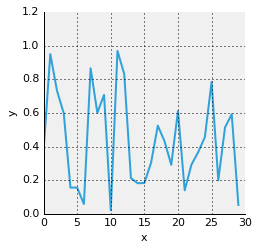

In [9]:
np.random.seed(42)
curve = hv.Curve(np.random.rand(30), extents=(0,0,30,1.2))
curve

You can annotate the this curve with an ``hv.Arrow`` object as follows:

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Arrow.I  :Arrow   [x,y]
   .Arrow.II :Arrow   [x,y]
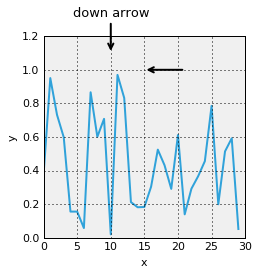

In [19]:
curve * hv.Arrow(15, 1.0) * hv.Arrow(10,1.1, direction='v', text='down arrow')

Note that the arrow is axis-aligned and that currently, HoloViews does not support arrow pointing in arbitrary directions. However, using the ``final_hook`` plot option, we can write a small function to get around this limitation:

In [46]:
def add_arrow(plot, element):
    "Plot a slanted arrow directly on the matplotlib axis"
    axis = plot.handles['axis']
    axis.annotate("slanted arrow", xy=(10, 1), xycoords='data',
      xytext=(3, 1.2), textcoords='data',
      arrowprops=dict(arrowstyle="->", color='k',
      connectionstyle="arc3"))

This code gets the axis from the plot.handles and then adds the custom Arrow annotation. You can then supply this function to the ``final_hooks`` plot option (as a list) as follows:

b':Curve   [x]   (y)'
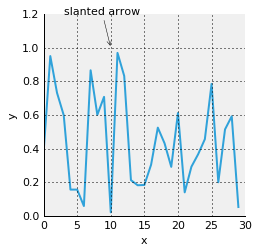

In [50]:
%%opts Curve [final_hooks=[add_arrow]]
curve

Naturally, you can also use the ``__call__`` syntax too:

b':Curve   [x]   (y)'
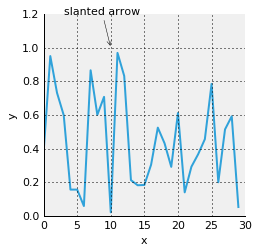

In [52]:
curve(plot={'final_hooks':[add_arrow]})